<a href="https://colab.research.google.com/github/jonathan-pap/Data-Analyst-Udacity/blob/main/ford_go_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ford GoBike trends in usage
## by Jonathan Papworth

## Investigation Overview


> during the investigaiton there was a visible trend of customer habbits for the goBike system , the main variable to share will be time in seasons, months weekday and hours.

## Dataset Overview

> The dataset contains data of 1,863,720 bike trips. variables in the set include for start / end times. starting location and end destination, birth year and gender. Additional variables needed to be calculated from the start time for the exploration & presentation such month / seasons, as these were not avialble in the original data.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
bikes_clean = pd.read_csv('bikes_clean.csv')

#define function for proportions
def proportion(prop):
    proportion = prop.value_counts(normalize=True) * 100
    return proportion

#define chart labels
def chart_labels(x_label,y_label,title):
    plt.title(title, fontsize = 13, fontweight='semibold' )
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    return plt.title, plt.xlabel, plt.ylabel

#dictionary of Days  Months for plot ordering
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Seasonal Trends

> Here we show the season trend of users of the goBike system, We can see clearly the numbers of trips is greater
during the summer or hotter months of the year.

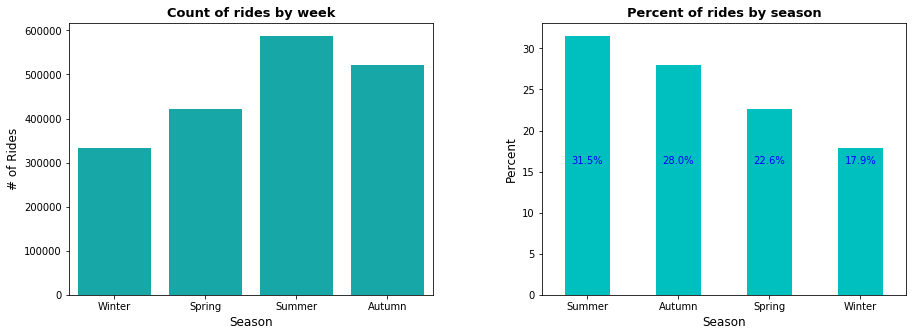

In [ ]:
#define plot size and spacing
plt.figure(figsize=(15, 12)).subplots_adjust(hspace = 0.4, wspace = 0.3)

#plot rides of season
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x = 'season', color = 'c')
chart_labels('Season','# of Rides','Count of rides by week')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['season']).plot(kind='bar', color = 'c')
chart_labels('Season','Percent','Percent of rides by season')

# add annotations
n_points = bikes_clean.shape[0]
cat_counts = bikes_clean['season'].value_counts()
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,16, pct_string, ha = 'center', color = 'B')
plt.xticks(rotation = 0)
plt.show()

## Daily use Habbits

> In this visualization I show the habbits of Customers and Subcribers, showing that Customers in general the aveage duration is 30 minutes while subscribers on average is around 10 minutes per trip. We can also see that the trend in seasons and that there is less usage for both Customer and Subscribers during the Winter compared to that of the Summer.

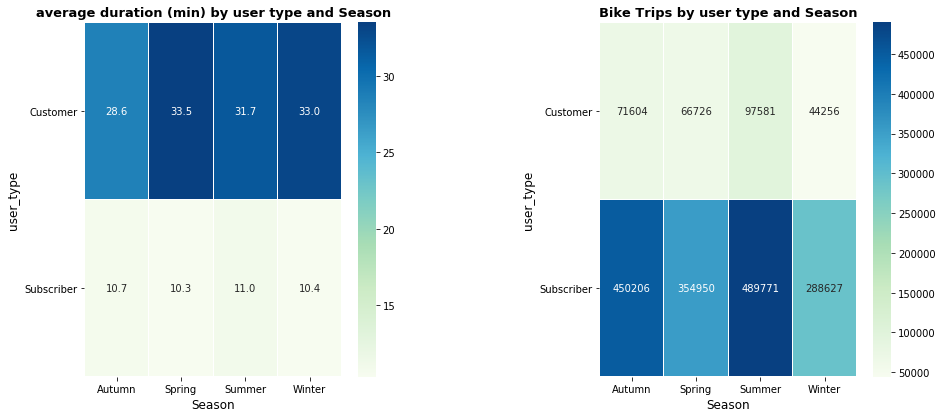

In [ ]:
plt.figure(figsize=(15, 15)).subplots_adjust(hspace = 0.3, wspace = 0.6)
plt.subplot(2, 2 ,1)
#define pivot base on month, user type and calulate trip duration mean.
month_duration = bikes_clean.pivot_table(index='user_type', columns='season',
                                         values='duration_min', aggfunc=np.mean)

#plot month duration as heatmap
sns.heatmap(month_duration, linewidths=.1, annot=True, fmt='0.1f', cmap="GnBu")
plt.yticks(rotation=0) 
chart_labels('Season','User Type','average duration (min) by user type and Season')


plt.subplot(2, 2 ,2)
#define pivot base on user type, and gender and calulate number of trips .
month_trip = bikes_clean.pivot_table(index='user_type', columns='season',
                                         values='bike_id', aggfunc={'bike_id':len})

#plot month duration as heatmap
sns.heatmap(month_trip,linewidths=.1,annot=True,fmt='d',cmap='GnBu')
plt.yticks(rotation=0) 
# set plot's labels
chart_labels('Season','User Type','Bike Trips by user type and Season')
plt.show()

## Time of Day for Rentals

>The next set of slides shows the the habbits of all rentals by day here we can see that Monday-Friday most rentals are between the hours of 8-5am and 5-6pm. Customers in general rent most druing 4-5pm

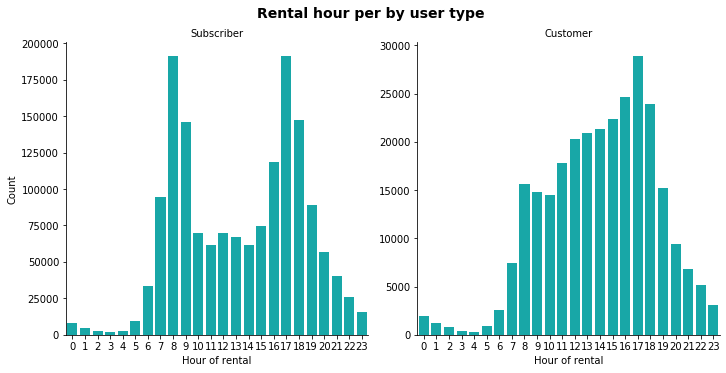

In [ ]:
#plot count starting hours for each use type 
h = sns.catplot(data=bikes_clean, x='start_hour', col="user_type",kind='count',sharey = False, color='c')
h.set_axis_labels("Hour of rental", "Count")
h.set_titles("{col_name}")
h.fig.suptitle('Rental hour per by user type', y=1.03, fontsize=14, fontweight='semibold');
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!